# TARP Project


# Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Loading the dataset

In [2]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df.shape

(28382, 21)

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Missing Values

Before we build the model, it is important to look for missing values within the dataset as treating the missing values is a necessary step before we fit a model on the dataset.

In [5]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of this function shows that there are quite a few missing values in columns gender, dependents, occupation, city and days since last transaction.

##### It is important to note the datatype of each column for data cleaning

In [6]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

###  Gender

In [7]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [8]:
(df['gender'].value_counts()/len(df['gender']))*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

Since there is a good mix of males and females and missing values cannot be filled with any one of them. We could create a seperate category by assigning the value -1 for all missing values in this column.

We convert the gender into 0 for female and 1 for male and then replace missing values with -1


In [9]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

### Dependents, Occupation and City with mode

We will do a value count for each of the dependents, occupations and city column and fill missing values with mode as this is sort of an ordinal variable.


In [10]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [11]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [12]:
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')

In [13]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [14]:
df['city'] = df['city'].fillna(1020)

### Days since Last Transaction

A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999.

In [15]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

##### Making sure that no null values are left in the dataframe

In [16]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

## Visualizing the Dataset for potential relationships between variables

<AxesSubplot:xlabel='vintage'>

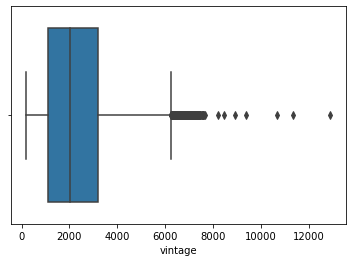

In [17]:
sns.boxplot(x=df['vintage'],orient='v')

<AxesSubplot:xlabel='age', ylabel='Density'>

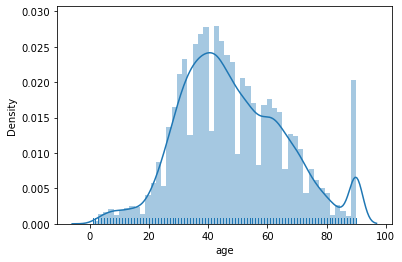

In [18]:
sns.distplot(df['age'],rug=True)

<AxesSubplot:xlabel='age'>

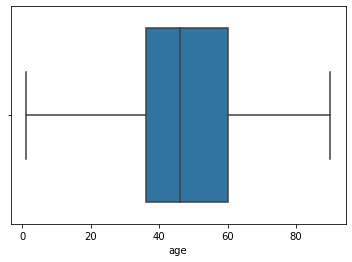

In [19]:
sns.boxplot(x=df['age'],orient='v')

<AxesSubplot:xlabel='dependents', ylabel='count'>

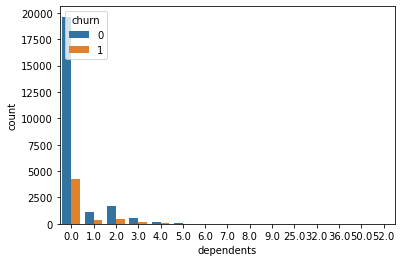

In [20]:
sns.countplot(x=df['dependents'],hue=df['churn'])

<AxesSubplot:xlabel='dependents', ylabel='Density'>

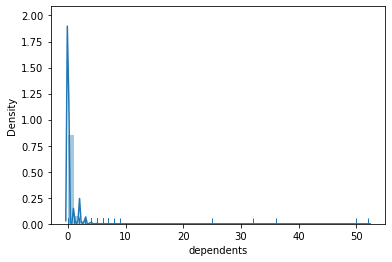

In [21]:
sns.distplot(df['dependents'],rug=True)

<AxesSubplot:xlabel='occupation', ylabel='count'>

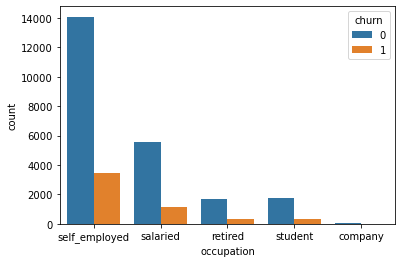

In [22]:
sns.countplot(x=df['occupation'],hue=df['churn'])

<AxesSubplot:xlabel='customer_nw_category', ylabel='count'>

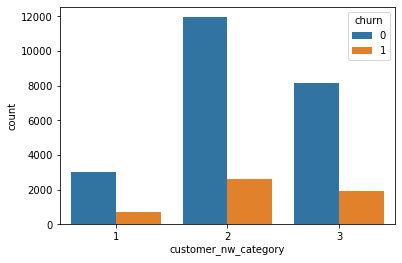

In [23]:
sns.countplot(x=df['customer_nw_category'],hue=df['churn'])

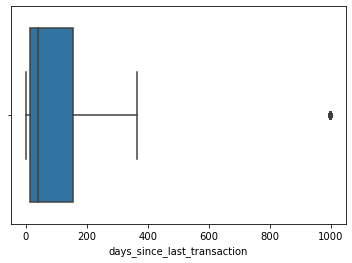

In [24]:
ax=sns.boxplot(x=df['days_since_last_transaction'],orient='v')

<AxesSubplot:xlabel='gender', ylabel='count'>

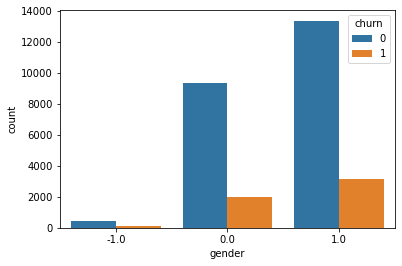

In [25]:
sns.countplot(x=df['gender'],hue=df['churn'])

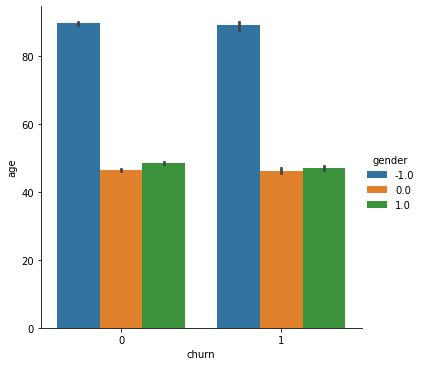

In [26]:
sns.catplot(x="churn", y="age", hue="gender", kind="bar", data=df)

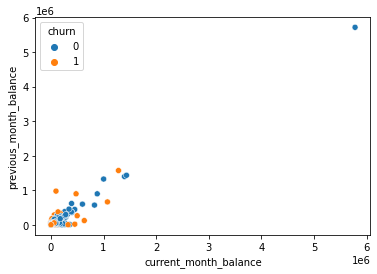

In [27]:
ax = sns.scatterplot(x="current_month_balance", y="previous_month_balance", hue="churn", data=df)

<AxesSubplot:xlabel='current_balance', ylabel='Density'>

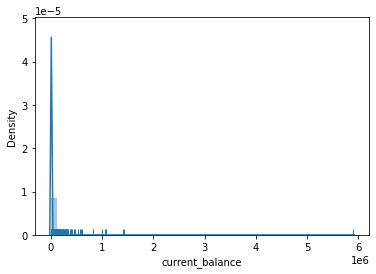

In [28]:
sns.distplot(df['current_balance'],rug=True)

<AxesSubplot:xlabel='previous_month_end_balance', ylabel='Density'>

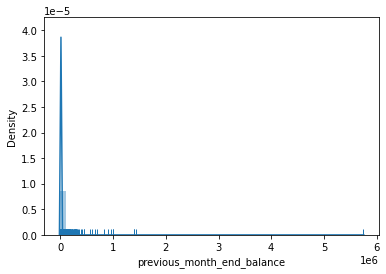

In [29]:
sns.distplot(df['previous_month_end_balance'],rug=True)

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='Density'>

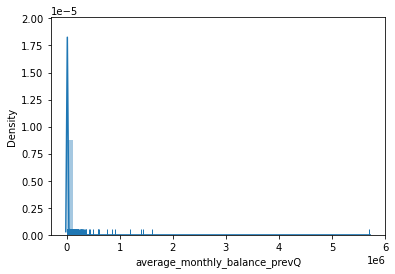

In [30]:
sns.distplot(df['average_monthly_balance_prevQ'],rug=True)

<AxesSubplot:xlabel='average_monthly_balance_prevQ2', ylabel='Density'>

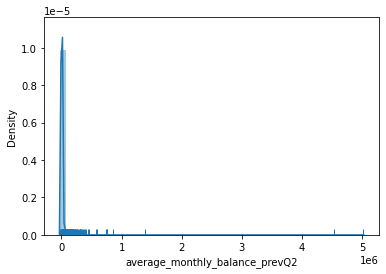

In [31]:
sns.distplot(df['average_monthly_balance_prevQ2'],rug=True)

<AxesSubplot:xlabel='current_month_credit', ylabel='Density'>

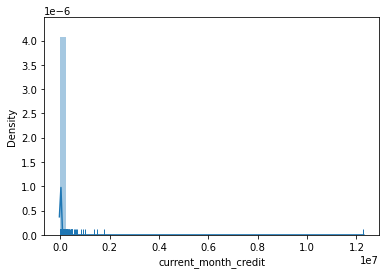

In [32]:
sns.distplot(df['current_month_credit'],rug=True)

<AxesSubplot:xlabel='previous_month_credit', ylabel='Density'>

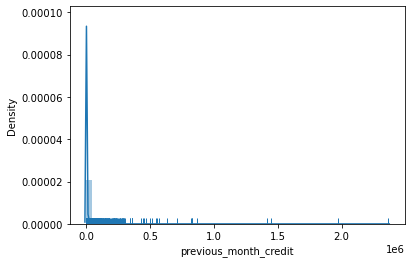

In [33]:
sns.distplot(df['previous_month_credit'],rug=True)

<AxesSubplot:xlabel='current_month_debit', ylabel='Density'>

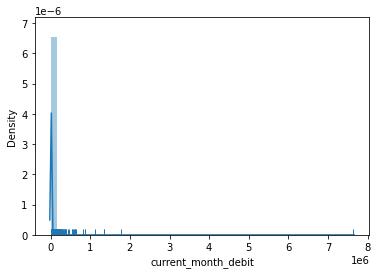

In [34]:
sns.distplot(df['current_month_debit'],rug=True)

<AxesSubplot:xlabel='previous_month_debit', ylabel='Density'>

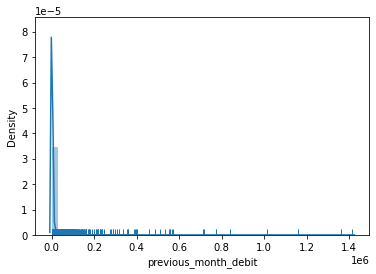

In [35]:
sns.distplot(df['previous_month_debit'],rug=True)

<AxesSubplot:xlabel='current_month_balance', ylabel='Density'>

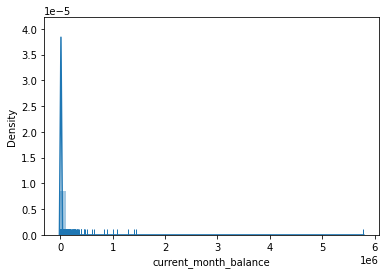

In [36]:
sns.distplot(df['current_month_balance'],rug=True)

<AxesSubplot:xlabel='previous_month_balance', ylabel='Density'>

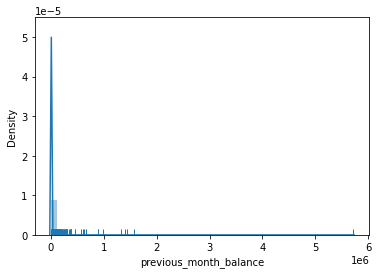

In [37]:
sns.distplot(df['previous_month_balance'],rug=True)

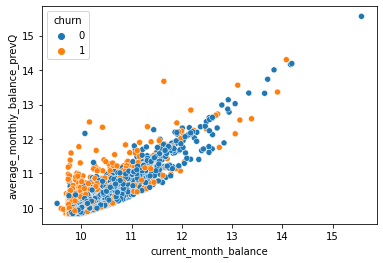

In [38]:
ax = sns.scatterplot(x=np.log(df["current_month_balance"]+17000), y=np.log(df["average_monthly_balance_prevQ"]+17000), hue=df["churn"])

## Preprocessing

Now, before applying any machine learning model, we need to scale the data and keep all features as numeric strictly.


In [39]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

#### Scaling Numerical Features

There are a lot of outliers in the dataset as seen in the visualizations. The distributions are also skewed. We will take 2 steps to deal with that here:

    Log Transformation
    Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all balance features.

In [40]:
all_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance','vintage','age','dependents']

num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[all_cols])
scaled = pd.DataFrame(scaled,columns=all_cols)

In [41]:
df_org = df.copy()
df = df.drop(columns = all_cols, axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")
y_all = df.churn
x_all=df.drop(['churn','customer_id','occupation'],axis = 1)

## Model Building and Evaluation Metrics

Since this is a binary classification problem, we could use the following 2 popular metrics:

    1. Recall
    2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.


### Conclusions from EDA

    1. For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
    2. For all the balance features the lower values have much higher proportion of churning customers
    3. For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable
    4. We see significant difference for different occupations and certainly would be interesting to use as a feature for prediction of churn.

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a ML models to check the ROC-AUC Score & the confusion matrix.


In [42]:
x_all.head()

,gender,city,branch_code,days_since_last_transaction,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category,...,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,vintage,age,dependents
0,1.0,187.0,755,224.0,0,0,0,1,0,-0.341470,...,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207,0.478644,0.999147,-0.330877
1,1.0,1020.0,3214,60.0,0,0,0,1,0,-0.341470,...,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680,-1.275909,-0.741756,-0.330877
2,1.0,146.0,41,999.0,0,0,1,0,0,-0.341470,...,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642,-0.005178,-0.966389,-0.330877
3,-1.0,1020.0,582,147.0,0,0,0,1,0,-0.341470,...,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056,-1.171568,2.346943,-0.330877
4,1.0,1494.0,388,58.0,0,0,0,1,0,1.172658,...,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732,0.103512,-0.348649,1.756001


In [43]:
y_all.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split as tts
trainX,testX,trainY,testY=tts(x_all,y_all,random_state=50,stratify=y_all)

trainX.shape, testX.shape, trainY.shape, testY.shape

((21286, 23), (7096, 23), (21286,), (7096,))

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression as LR

LR_clf=LR(max_iter=1000)
LR_clf.fit(trainX,trainY)
LR_str=LR_clf.score(trainX,trainY)
LR_ste=LR_clf.score(testX,testY)
LR_pred=LR_clf.predict(testX)
LR_predP = LR_clf.predict_proba(testX)[:,1]
LR_str,  LR_ste  


(0.84064643427605, 0.8476606538895152)

### K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS

In [47]:
def ScoreVal(n):
    avg=[]
    std=[]
    for i in n:
        s=CVS(KNN(n_neighbors=i),X=trainX,y=trainY, cv=10)
        avg.append(s.mean())
        std.append(s.std())
    
    return avg,std

In [48]:
n=range(20,50)
mean,std=ScoreVal(n)

Text(0.5, 1.0, 'Mean Validation Score')

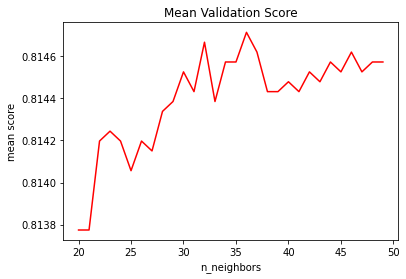

In [49]:
plt.plot(n,mean,color='red',label=mean)
plt.xlabel('n_neighbors')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

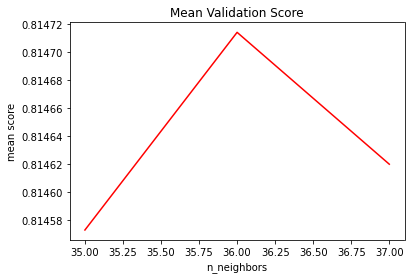

In [50]:
plt.plot(n[15:18],mean[15:18],color='red',label=mean)
plt.xlabel('n_neighbors')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

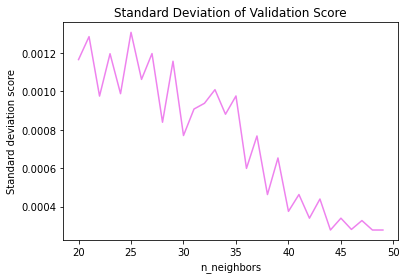

In [51]:
plt.plot(n,std,color='violet',label=mean)
plt.xlabel('n_neighbors')
plt.ylabel('Standard deviation score')
plt.title('Standard Deviation of Validation Score')

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

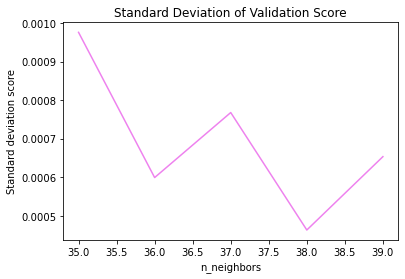

In [52]:
plt.plot(n[15:20],std[15:20],color='violet',label=mean)
plt.xlabel('n_neighbors')
plt.ylabel('Standard deviation score')
plt.title('Standard Deviation of Validation Score')

In [53]:
Knn_clf=KNN(n_neighbors=38)
Knn_clf.fit(trainX,trainY)
Knn_score_train=Knn_clf.score(trainX,trainY)
Knn_score_test=Knn_clf.score(testX,testY)
Knn_pred=Knn_clf.predict(testX)
Knn_predP = Knn_clf.predict_proba(testX)[:,1]
Knn_score_train, Knn_score_test


(0.8151367095743681, 0.8151071025930101)

### Decision Tree Classifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [55]:
def ScoreVal_DT(n):
    avg=[]
    std=[]
    for i in n:
        s=CVS(DTC(max_depth=i),X=trainX,y=trainY, cv=10)
        avg.append(s.mean())
        std.append(s.std())
    
    return avg,std

In [56]:
n=range(1,25)
mean,std=ScoreVal_DT(n)

Text(0.5, 1.0, 'Mean Validation Score')

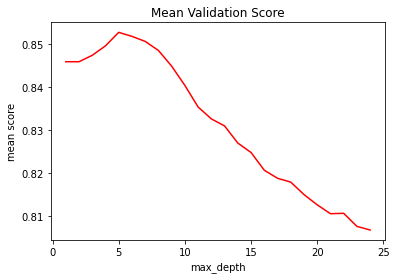

In [57]:
plt.plot(n,mean,color='red',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

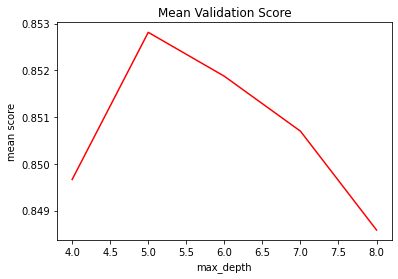

In [58]:
plt.plot(n[3:8],mean[3:8],color='red',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

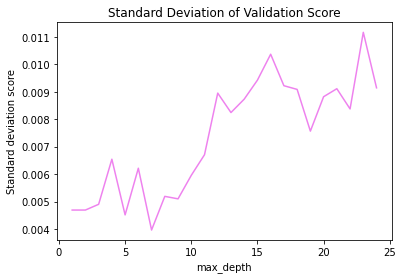

In [59]:
plt.plot(n,std,color='violet',label=std)
plt.xlabel('max_depth')
plt.ylabel('Standard deviation score')
plt.title('Standard Deviation of Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

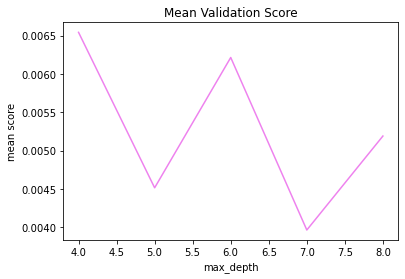

In [60]:
plt.plot(n[3:8],std[3:8],color='violet',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

In [61]:
Dtc_clf=DTC(max_depth=6)
Dtc_clf.fit(trainX,trainY)
Dtc_score_train=Dtc_clf.score(trainX,trainY)
Dtc_score_test=Dtc_clf.score(testX,testY)
Dtc_pred=Dtc_clf.predict(testX)
Dtc_predP = Dtc_clf.predict_proba(testX)[:,1]
Dtc_score_train, Dtc_score_test

(0.8696326223809077, 0.8576662908680946)

### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
NB_clf=GaussianNB()
NB_clf.fit(trainX,trainY)
NB_score_train=NB_clf.score(trainX,trainY)
NB_score_test=NB_clf.score(testX,testY)
NB_pred=NB_clf.predict(testX)
NB_predP = NB_clf.predict_proba(testX)[:,1]
NB_score_train, NB_score_test

(0.7851169782955933, 0.7869222096956031)

### Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [65]:
SVM_clf=SVC()
SVM_clf.fit(trainX,trainY)
SVM_score_train=SVM_clf.score(trainX,trainY)
SVM_score_test=SVM_clf.score(testX,testY)
SVM_pred=SVM_clf.predict(testX)
SVM_score_train, SVM_score_test

(0.8146669172225877, 0.814684329199549)

### Stochastic Gradient Descent

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
SDG_clf = SGDClassifier(loss='hinge')
SDG_clf.fit(trainX,trainY)
SDG_score_train=SDG_clf.score(trainX,trainY)
SDG_score_test=SDG_clf.score(testX,testY)
SDG_pred=SDG_clf.predict(testX)
SDG_score_train, SDG_score_test

(0.6348304049610073, 0.6275366403607666)

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
def ScoreVal_RF(n):
    avg=[]
    std=[]
    for i in n:
        s=CVS(RandomForestClassifier(max_depth=i),X=trainX,y=trainY, cv=10)
        avg.append(s.mean())
        std.append(s.std())
    
    return avg,std

In [70]:
n=range(10,20)
mean,std=ScoreVal_RF(n)

Text(0.5, 1.0, 'Mean Validation Score')

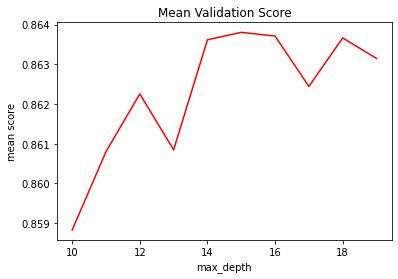

In [71]:
plt.plot(n,mean,color='red',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

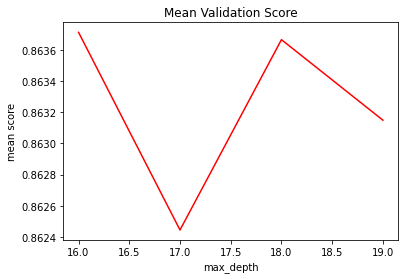

In [72]:
plt.plot(n[6:10],mean[6:10],color='red',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

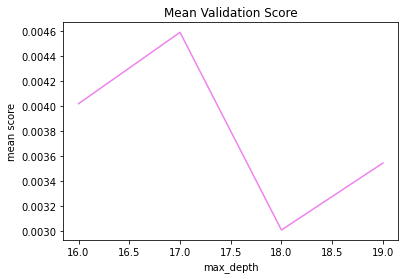

In [73]:
plt.plot(n[6:10],std[6:10],color='violet',label=mean)
plt.xlabel('max_depth')
plt.ylabel('mean score')
plt.title('Mean Validation Score')

In [74]:
#max_depth=2, random_state=0
RFC_clf = RandomForestClassifier(max_depth=17, random_state=0)
RFC_clf.fit(trainX,trainY)
RFC_score_train=RFC_clf.score(trainX,trainY)
RFC_score_test=RFC_clf.score(testX,testY)
RFC_pred=RFC_clf.predict(testX)
RFC_predP = RFC_clf.predict_proba(testX)[:,1]
RFC_score_train, RFC_score_test

(0.9565442074603026, 0.866685456595265)

### K- Means

In [75]:
from sklearn.cluster import KMeans

In [76]:
km_clf = KMeans(n_clusters=2, random_state=0)
km_clf.fit(trainX,trainY)
km_pred=km_clf.predict(testX)
qwe=km_clf.predict(trainX)
km_ste=accuracy_score(testY, km_pred)
km_str=accuracy_score(trainY, qwe)
km_str, km_ste

(0.629991543737668, 0.6213359639233371)

### AUC ROC Curve & Confusion Matrix 

Now, let us quickly look at the AUC-ROC curve for all our models and also the confusion matrix.

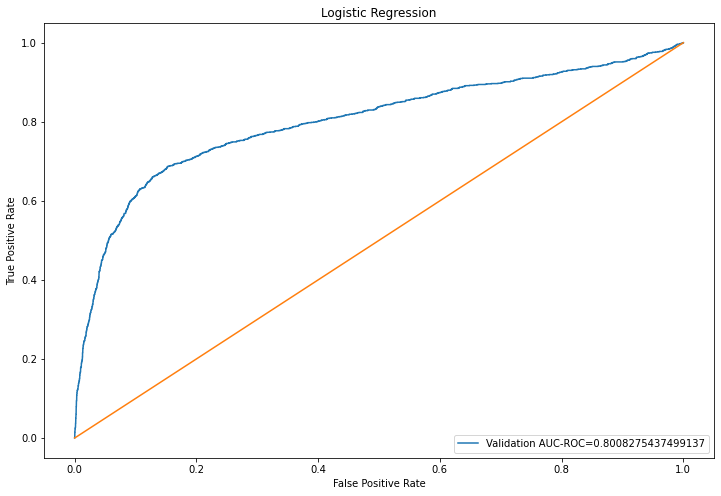

In [77]:
fpr, tpr, _ = roc_curve(testY,LR_predP) 
auc = roc_auc_score(testY,LR_predP) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('Logistic Regression')
plt.show()

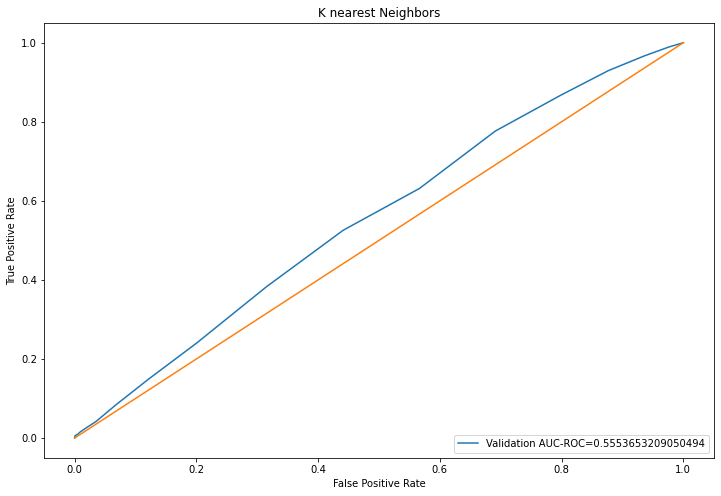

In [78]:
fpr, tpr, _ = roc_curve(testY,Knn_predP) 
auc = roc_auc_score(testY,Knn_predP) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('K nearest Neighbors')
plt.show() 

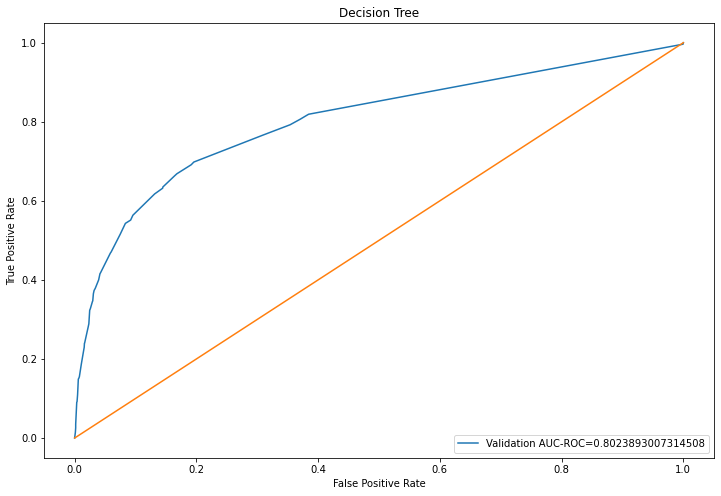

In [79]:
fpr, tpr, _ = roc_curve(testY,Dtc_predP) 
auc = roc_auc_score(testY,Dtc_predP) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('Decision Tree')
plt.show()

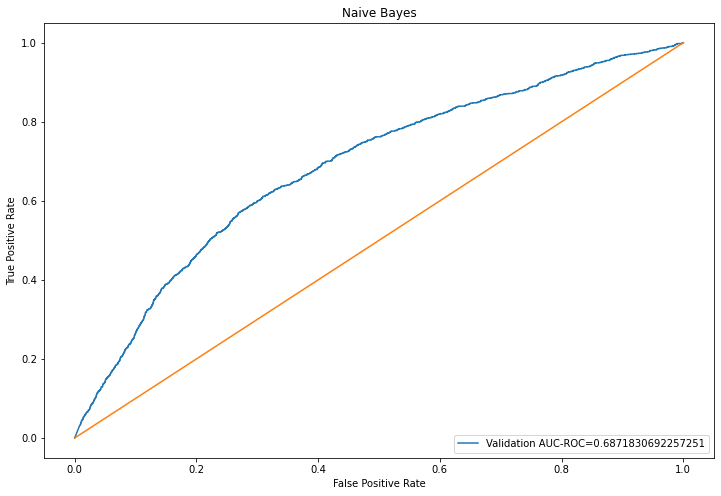

In [80]:
fpr, tpr, _ = roc_curve(testY,NB_predP) 
auc = roc_auc_score(testY,NB_predP) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('Naive Bayes')
plt.show()

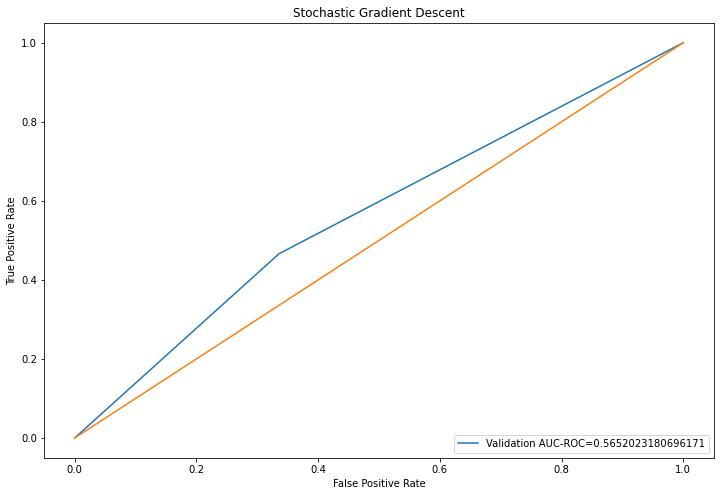

In [81]:
fpr, tpr, _ = roc_curve(testY,SDG_pred) 
auc = roc_auc_score(testY,SDG_pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('Stochastic Gradient Descent')
plt.show()

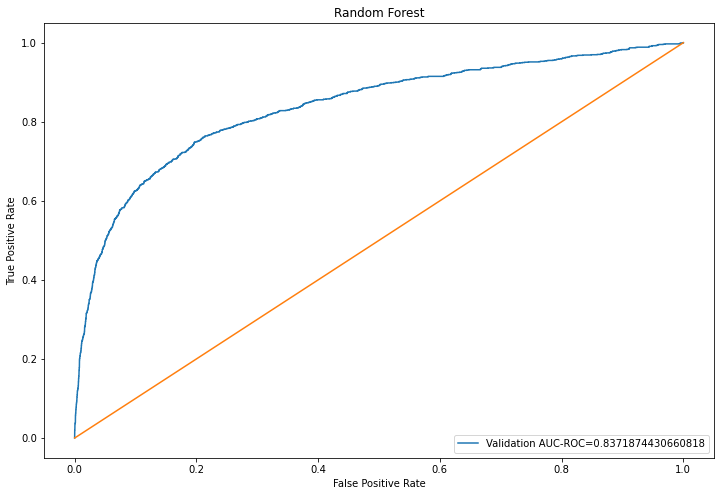

In [82]:
fpr, tpr, _ = roc_curve(testY,RFC_predP) 
auc = roc_auc_score(testY,RFC_predP) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.title('Random Forest')
plt.show()

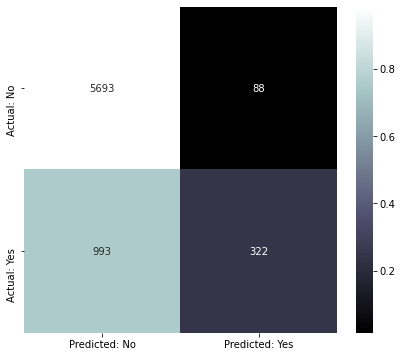

In [83]:
label_preds = LR_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

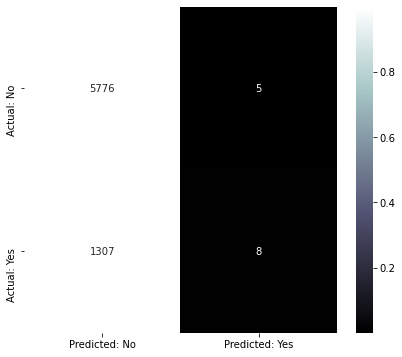

In [84]:
label_preds = Knn_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

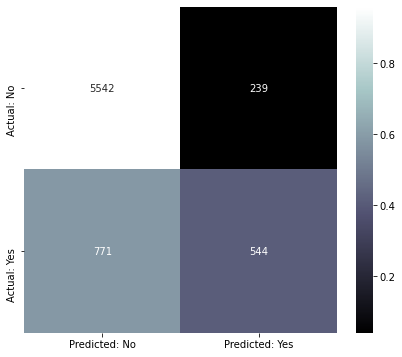

In [85]:
label_preds = Dtc_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

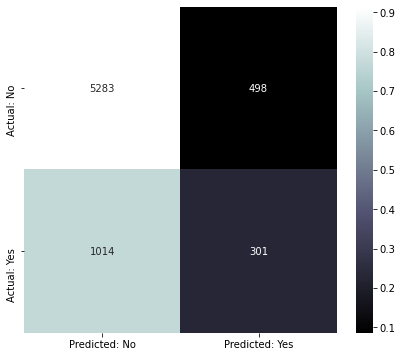

In [86]:
label_preds = NB_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

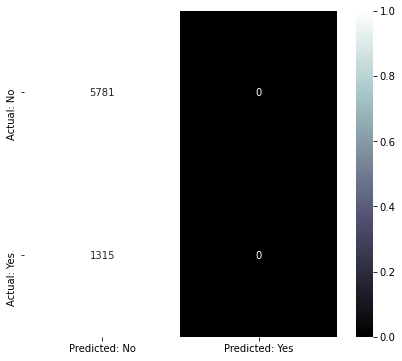

In [87]:
label_preds = SVM_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

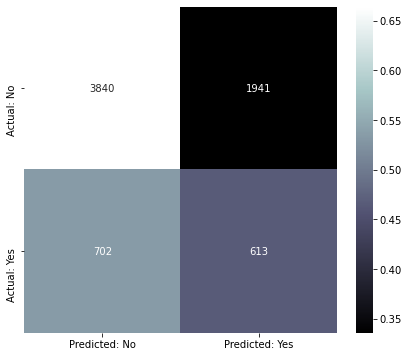

In [88]:
label_preds = SDG_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

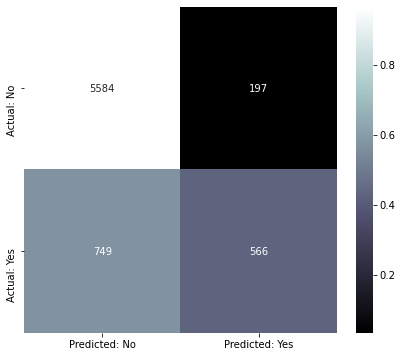

In [89]:
label_preds = RFC_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

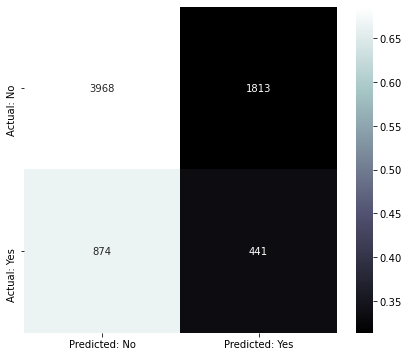

In [90]:
label_preds = km_pred

cm = confusion_matrix(testY,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [91]:
results_df = pd.DataFrame({'LR':LR_ste, 'Knn': Knn_score_test, 'DTC': Dtc_score_test, 'NB':NB_score_test, 'SVM':SVM_score_test, 'SDG':SDG_score_test, 'RFC':RFC_score_test, 'KM':km_ste},index=['Comaparision'])


<AxesSubplot:>

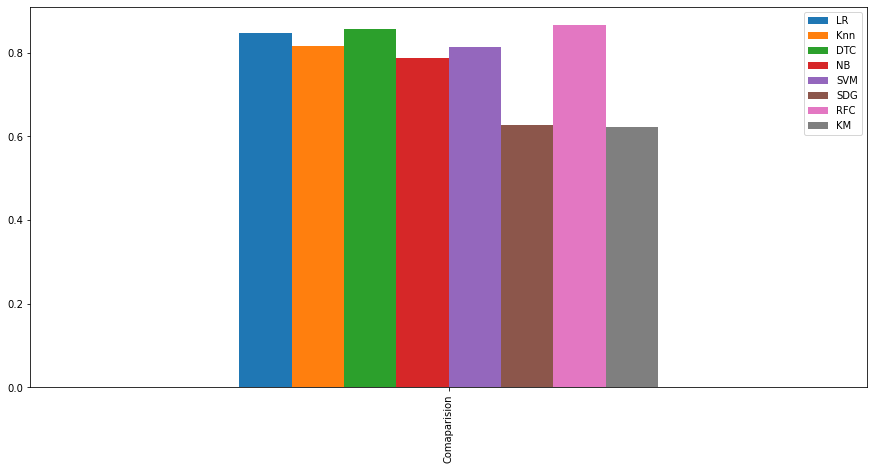

In [92]:
results_df.plot(y=["LR", "Knn", "DTC","NB","SVM","SDG","RFC","KM"], kind="bar",figsize=(15,7))

* Saving the model

In [93]:
import joblib
joblib.dump(RFC_clf, "./random_forest.joblib")

['./random_forest.joblib']

In [95]:
loaded_rf = joblib.load("./models/random_forest.joblib")

In [96]:
data_array = [3135,66,1,0,0,0,0,1,0,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.2,0.2,0.2,0.2,1458.71,1458.71]
data_array_two=[2349,18,1,0,0,0,0,0,1,1232,2,474,59,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.4,1094.09,2402.62,3260.58]

#0
data_array = np.array(data_array)
data_array = data_array.reshape(1,-1)

#1
data_array_two = np.array(data_array_two)
data_array_two = data_array_two.reshape(1,-1)


loaded_rf.predict(data_array_two)

array([0], dtype=int64)